In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df2 = df[['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'alone']]

In [6]:
df2.dtypes

survived      int64
pclass        int64
sex          object
age         float64
parch         int64
fare        float64
alone          bool
dtype: object

In [7]:
df2.loc[df2.alone==True, 'alone'] = 1
df2.loc[df2.alone==False, 'alone'] = 0


/Users/scl03/anaconda3/envs/DS/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
df2['rand_num'] = np.random.randint(1, 100, df2.shape[0])
df2[df2.rand_num == 41]

/Users/scl03/anaconda3/envs/DS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,survived,pclass,sex,age,parch,fare,alone,rand_num
92,0,1,male,46.0,0,61.1750,0,41
179,0,3,male,36.0,0,0.0000,1,41
185,0,1,male,NaN,0,50.0000,1,41
566,0,3,male,19.0,0,7.8958,1,41
598,0,3,male,NaN,0,7.2250,1,41
638,0,3,female,41.0,5,39.6875,0,41
665,0,2,male,32.0,0,73.5000,0,41
674,0,2,male,NaN,0,0.0000,1,41


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df2['sex'] = LabelEncoder().fit_transform(df2.sex)

In [15]:
df2 = df2.dropna()

In [16]:
df2.head()

,survived,pclass,sex,age,parch,fare,alone,rand_num
0,0,3,1,22.0,0,7.2500,0,11
1,1,1,0,38.0,0,71.2833,0,34
2,1,3,0,26.0,0,7.9250,1,92
3,1,1,0,35.0,0,53.1000,0,59
4,0,3,1,35.0,0,8.0500,1,71


In [17]:
import MLLytics

In [18]:
from MLLytics.plots import plot_cluster_corr

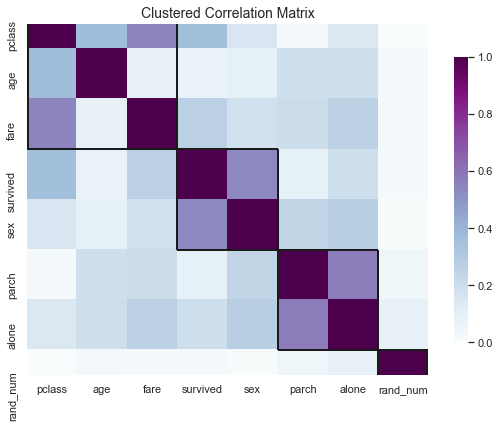

In [19]:
plot_cluster_corr(df2.corr())

In [20]:
from sklearn.model_selection import train_test_split

In [72]:
X = df2.drop(columns=['survived'])

In [73]:
y = df2[['survived']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
X_train.head()

,pclass,sex,age,parch,fare,alone,rand_num
37,3,1,21.0,0,8.0500,1,20
58,2,0,5.0,2,27.7500,0,61
57,3,1,28.5,0,7.2292,1,51
94,3,1,59.0,0,7.2500,1,47
209,1,1,40.0,0,31.0000,1,43


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(X_train, y_train)

/Users/scl03/anaconda3/envs/DS/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/scl03/anaconda3/envs/DS/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
lr.score(X_test, y_test)

0.7767441860465116

In [80]:
import shap

In [81]:
shap.initjs()

In [82]:
explainer = shap.LinearExplainer(lr, X_train, feature_dependence='independent')

In [83]:
shap_values = explainer.shap_values(X_test)

In [84]:
X_test_array = X_test.values

In [85]:
lr.predict_proba(X_train)[:,1].mean()

0.3956273305250313

In [86]:
np.exp(explainer.expected_value)

0.5821509664171851

In [87]:
len(shap_values)

215

In [88]:
len(X_test)

215

In [89]:
explainer.expected_value

-0.541025472417719

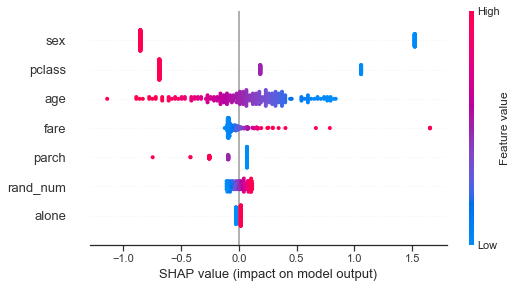

In [90]:
shap.summary_plot(shap_values, X_test_array, feature_names=X_test.columns)

In [91]:
ind = 0
shap.force_plot(explainer.expected_value, shap_values[ind, :], X_test_array[ind, :], feature_names=X_test.columns, link='logit')

In [92]:
ind = 1
shap.force_plot(explainer.expected_value, shap_values[ind, :], X_test_array[ind, :], feature_names=X_test.columns, link='logit')

In [93]:
ind = 2
shap.force_plot(explainer.expected_value, shap_values[ind, :], X_test_array[ind, :], feature_names=X_test.columns, link='logit')

In [94]:
ind = 3
shap.force_plot(explainer.expected_value, shap_values[ind, :], X_test_array[ind, :], feature_names=X_test.columns, link='logit')

In [96]:
X_test[X_test.rand_num==51]

,pclass,sex,age,parch,fare,alone,rand_num
149,2,1,42.0,0,13.0000,1,51
720,2,0,6.0,1,33.0000,0,51
114,3,0,17.0,0,14.4583,1,51


In [97]:
vals = list(X_test[X_test.rand_num==51].index)

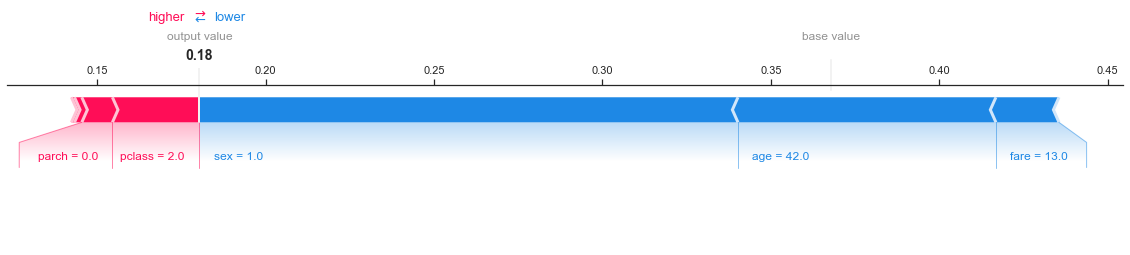

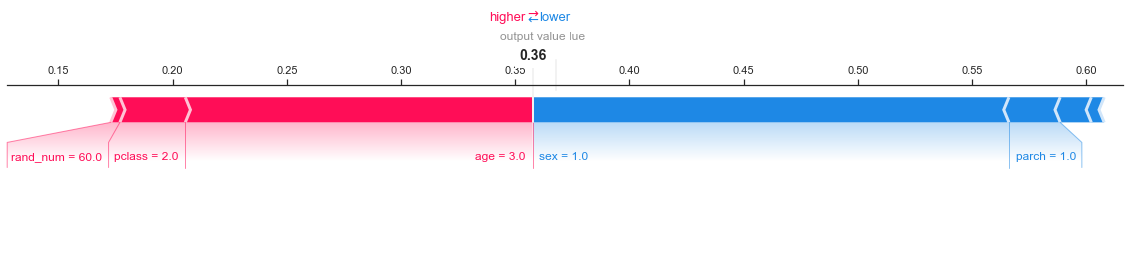

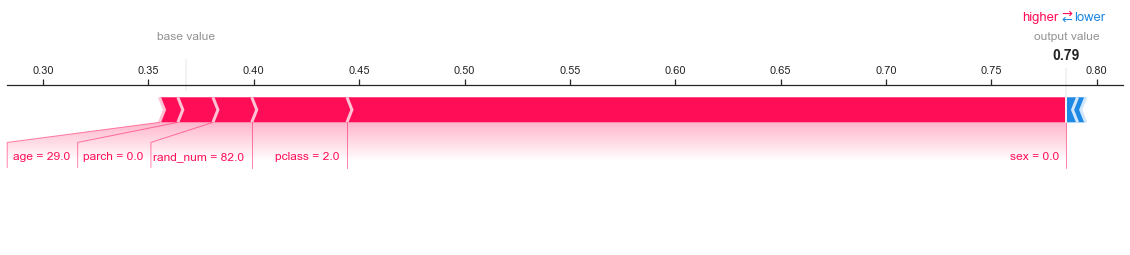

In [101]:
for i in range(0, len(vals)):
    ind = i
    shap.force_plot(explainer.expected_value, shap_values[ind, :], X_test_array[ind, :], 
                    feature_names=X_test.columns, link='logit', matplotlib=True)
    